# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# read dataframe
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Pengamatan\:
1. Data terdiri dari 10.000 baris dengan 14 kolom.
2. Tidak ada kolom dengan nilai null/missing values.
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (tipe data sudah sesuai).

## Cuplikan Data

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4420,4421,15571261,Toscani,714,Germany,Female,35,6,126077.43,2,1,1,53954.24,0
8713,8714,15578788,Bibi,786,Spain,Male,40,6,0.00,2,0,0,41248.80,0
9786,9787,15609521,Chimaraoke,803,Germany,Male,34,4,142929.16,2,1,1,114869.56,0
1964,1965,15738318,Kung,800,France,Female,40,5,97764.41,1,1,0,98640.15,1
9187,9188,15628863,Calabresi,601,France,Male,38,4,60013.81,1,1,1,38020.05,0


# Statistical Summary

In [5]:
# ubah Tipe data kolom
columns_to_convert = ['IsActiveMember', 'HasCrCard', 'Exited']
df[columns_to_convert] = df[columns_to_convert].astype(object)

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Geography', 'Gender','IsActiveMember', 'HasCrCard', 'Exited']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']

In [7]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,1.530200
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.581654
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,2.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,4.000000


In [8]:
# ringkasan statistik dari kolom kategorik
df[cats].describe()

,Geography,Gender,IsActiveMember,HasCrCard,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,5151,7055,7963


## Drop kolom

In [9]:
for col in df:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column RowNumber
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
------------------------------ 

value counts of column CustomerId
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
------------------------------ 

value counts of column Surname
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
------------------------------ 

value counts of column CreditScore
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
-----

In [10]:
# drop kolom `RowNumber`, `CustomerID`, `Surname`
df.drop(["RowNumber","CustomerId", "Surname"], axis=1, inplace=True)

Dilakukan drop pada kolom yang kurang relevan dengan target `Exited` seperti `RowNumber`, `CustomerID`, `Surname`. Ketiga kolom tersebut juga tidak memiliki nilai kosong ataupun data aneh (contoh: value tidak sesuai isi kolom), sehingga dilakukannya drop tidak mempengaruhi model.

# Data Cleaning and Preprocessing
## A. Handle Missing Values

In [11]:
# jumlah entry NULL di setiap kolom
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Tidak ada nilai null pada dataset.

## B. Handle Duplicated Data

In [12]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

Tidak ada baris duplikat.

## C. Handle Outliers

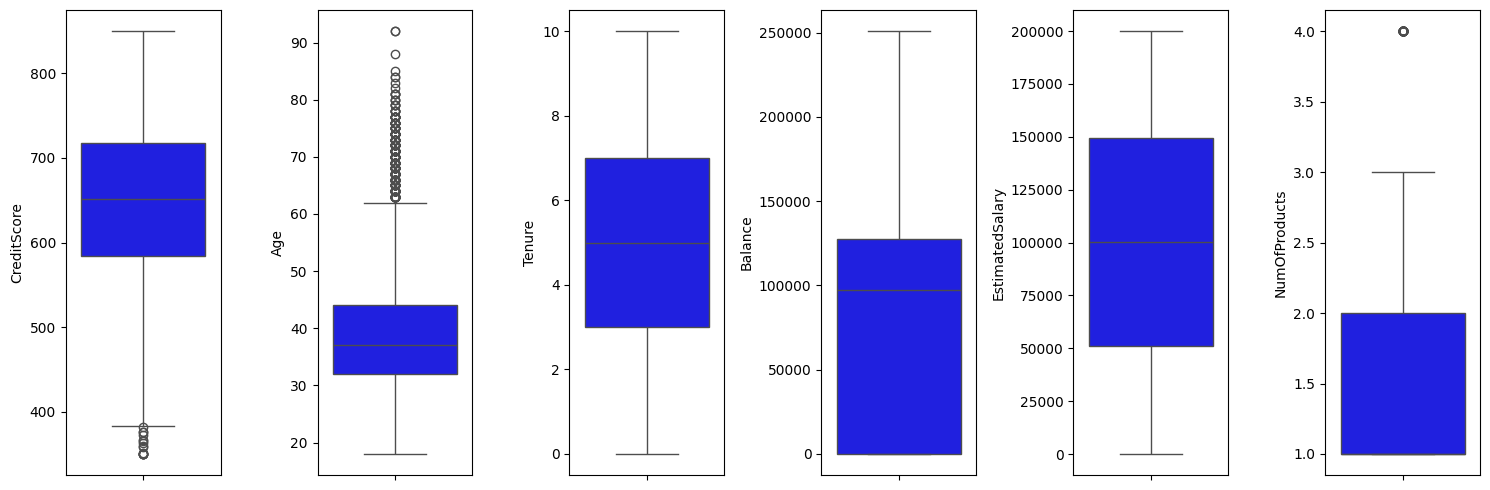

In [13]:
# melihat outliers melalui Boxplot (Numerical)
fig, axs = plt.subplots(1, len(nums), figsize=(15, 5))

for i in range(len(nums)):
    sns.boxplot(y=df[nums[i]], color='blue', ax=axs[i], orient='v')
plt.tight_layout()
plt.show()

In [14]:
# Langkah 3: Menangani outliers - Identifikasi outliers untuk kolom numerik menggunakan IQR

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

outliers_count = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_count[col] = len(outliers)
outliers_count

{'CreditScore': 15,
 'Age': 359,
 'Tenure': 0,
 'Balance': 0,
 'NumOfProducts': 60,
 'EstimatedSalary': 0}

Terdapat outliers pada fitur `CreditScore`,`Age`, dan `NumOfProducts` sehingga diperlukan handling outliers.

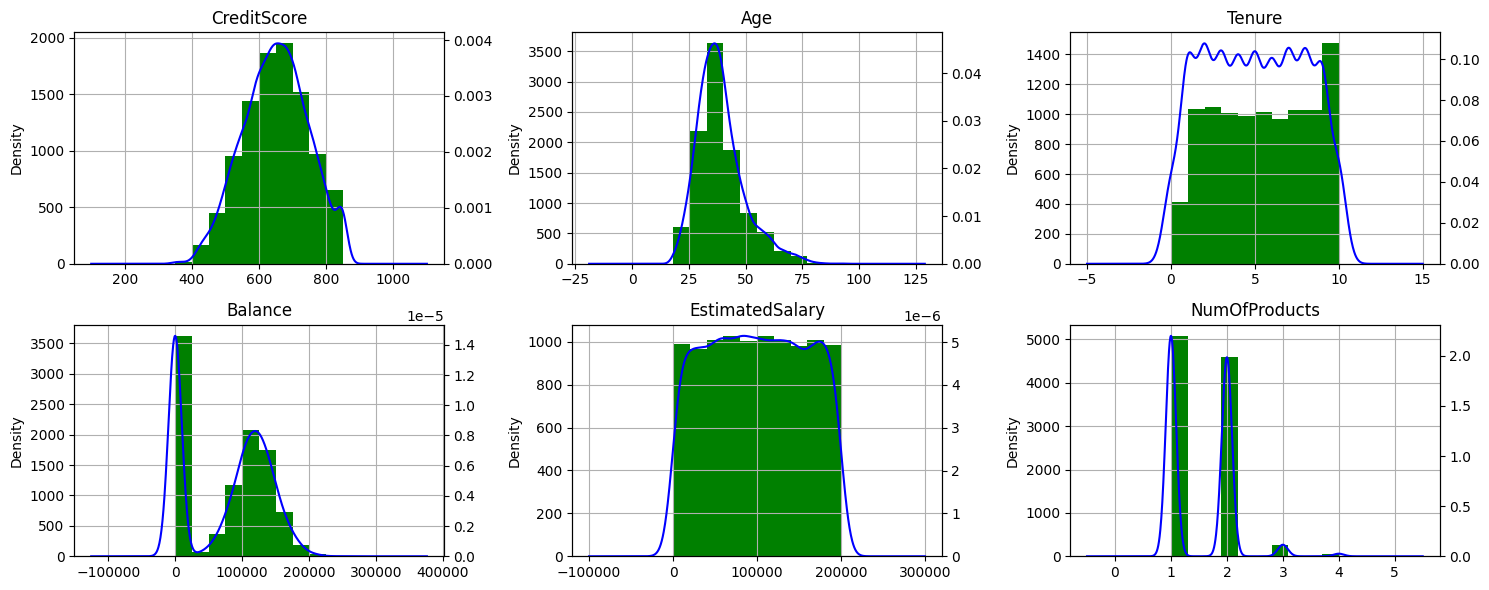

In [15]:
# melihat outliers dari fitur melalui distribusi data (Numerical)
features = nums
data_num = df[features]
nums = data_num.select_dtypes(include=['int', 'float']).columns
cats = data_num.select_dtypes(include=['object']).columns

k = len(nums)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

for i, col in enumerate(nums):
    r, c = i // n, i % n
    ax = axes[r, c]
    data_num[col].hist(ax=ax, color='green')
    ax2 = data_num[col].plot.kde(ax=ax, secondary_y=True, title=col, color='blue')
    ax2.set_ylim(0)

fig.tight_layout()
plt.show()

Distribusi data tiap fitur Analisa Plot: <br>
- `Tenure`, dan `EstimatedSalary` = sebaran data cenderung terdistribusi normal.
- `CreditScore`, `Age`,`Balance`,dan `NumOfProducts` = sebaran data skewed.
  - `CreditScore`= left skewed. Nantinya perlu dilakukan fitur transformasi menggunakan Normalization/Standardization. <br>
  - `Age`,`Balance`,`NumOfProducts`= right skewed. Nantinya perlu dilakukan fitur transformasi menggunakan Normalization/Standardization.


Kesimpulan handling outliers: <br>
Terdapat outliers pada fitur `CreditScore`, `Age`, dan `NumOfProducts`, sehingga disarankan dilakukan handling bisa dengan Z-Score ataupun IQR. Pemilihan handling outliers dipilih selain karena kesesuaian dengan distribusi data, tetapi juga mempertimbangkan jumlah outliers yang dibuang. Semakin sedikit data (outliers) yang dibuang semakin baik.<br>
Untuk variabel numerik semuanya perlu dilakukan standarisasi dikarenakan datanya tidak berdistribusi normal berdasarkan uji Shapiro-Wilk.

### Melakukan analisis Statistik untuk Pengujian distribusi data

#### Tes Shapiro-Wilk untuk variabel numerik sebelum transformasi dan encoding

In [16]:
from scipy.stats import shapiro
# Mengambil sampel data karena keterbatasan ukuran sampel untuk tes Shapiro-Wilk
sample_data = df[numerical_columns].sample(n=500, random_state=42)



# Hasil tes Shapiro-Wilk akan disimpan di sini

shapiro_results = {}



for col in sample_data.columns:

    stat, p = shapiro(sample_data[col])

    shapiro_results[col] = {'Statistic': stat, 'P-Value': p}



# Konversi hasil ke DataFrame untuk kemudahan pembacaan

shapiro_results_df = pd.DataFrame(shapiro_results).T



shapiro_results_df

,Statistic,P-Value
CreditScore,0.987729,3.270296e-04
Age,0.944395,9.587486e-13
Tenure,0.952197,1.220128e-11
Balance,0.850164,2.187417e-21
NumOfProducts,0.696666,5.091370e-29
EstimatedSalary,0.952082,1.172831e-11


 Kesimpulan Hasil Analisis Shapiro-Wilk

Hasil uji Shapiro-Wilk digunakan untuk menguji distribusi normalitas dari beberapa variabel dalam dataset. Berikut adalah ringkasan hasil uji untuk masing-masing variabel:

1. **CreditScore**:
   - Statistik Shapiro-Wilk: 0.987729
   - P-Value: 3.270296e-04 (0.000327)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa CreditScore tidak terdistribusi secara normal.

2. **Age**:
   - Statistik Shapiro-Wilk: 0.944395
   - P-Value: 9.587486e-13 (sangat mendekati nol)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa Age tidak terdistribusi secara normal.

3. **Tenure**:
   - Statistik Shapiro-Wilk: 0.952197
   - P-Value: 1.220128e-11 (sangat mendekati nol)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa Tenure tidak terdistribusi secara normal.

4. **Balance**:
   - Statistik Shapiro-Wilk: 0.850164
   - P-Value: 2.187417e-21 (sangat mendekati nol)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa Balance tidak terdistribusi secara normal.

5. **NumOfProducts**:
   - Statistik Shapiro-Wilk: 0.696666
   - P-Value: 5.091370e-29 (sangat mendekati nol)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa NumOfProducts tidak terdistribusi secara normal.

6. **EstimatedSalary**:
   - Statistik Shapiro-Wilk: 0.952082
   - P-Value: 1.172831e-11 (sangat mendekati nol)
   - **Kesimpulan**: Nilai p-value yang sangat rendah menunjukkan bahwa EstimatedSalary tidak terdistribusi secara normal.

Dalam semua kasus di atas, karena nilai p-value sangat rendah, kita memiliki cukup bukti untuk menolak hipotesis nol bahwa data terdistribusi normal. Oleh karena itu, variabel-variabel tersebut tidak mengikuti distribusi normal, dan ini penting untuk mempertimbangkan metode analisis atau transformasi data yang sesuai dalam analisis lebih lanjut.


### Menghilangkan Outliers dengan Z-Score

In [17]:
from scipy import stats

In [18]:
# handling outliers menggunakan Z-score
df_zscore = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in ['CreditScore','Age','NumOfProducts']:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_zscore = df_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9799


Catatan:<br>
Setelah dilakukan handling outliers menggunakan Z-score, dataset mengalami pengurangan data sebanyak **201 baris**.

### Menghilangkan Outliers dengan  IQR

----
```
Jangan di-run. Di bawah ini hanya sebagai contoh perbandingan antara handling outliers menggunakan **Z-Score vs IQR**.
```
----
----

In [19]:
# handling outliers menggunakan IQR (interquartile)
df_iqr = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))
for col in ['CreditScore','Age','NumOfProducts']:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries

df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9568


Catatan:<br>
Setelah dilakukan handling outliers menggunakan IQR, dataset mengalami pengurangan data sebanyak **432 baris**. <br>
Penghapusan data outliers di IQR lebih banyak dibandingkan dengan Z-Score. Sehingga kemungkinan handling outliers yang dipilih ialah menggunakan Z-Score.

----
----


## D. Feature Transformation

### Normalization / Standardization <br>
Dilakukan transformasi untuk fitur dengan distribusi skewed yaitu `CreditScore`,`Age`,`Balance`, dan `NumOfProducts`.

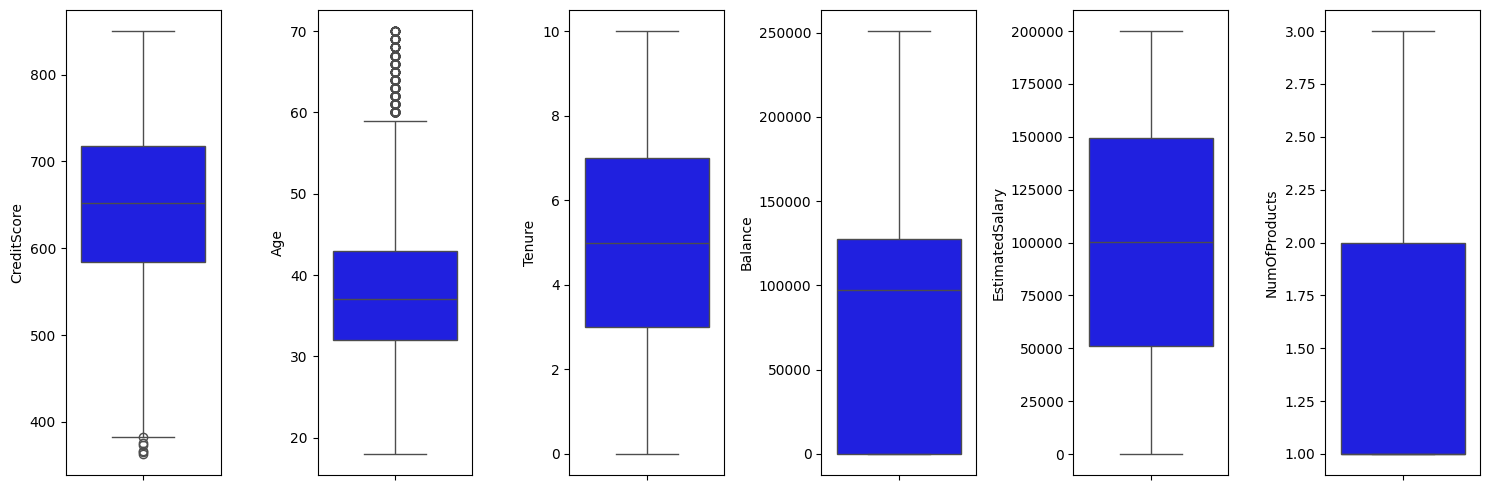

In [20]:
# melihat distribusi data (sebelum normalisasi / standardisasi)
fig, axs = plt.subplots(1, len(nums), figsize=(15, 5))

for i in range(len(nums)):
    sns.boxplot(y=df_zscore[nums[i]], color='blue', ax=axs[i], orient='v')
plt.tight_layout()
plt.show()

Hasil Pengamatan: <br>
Keenam dari kolom di atas memiliki skala dengan range yang berbeda-beda. <br> Sehingga perlu dilakukan transformasi fitur agar data memiliki skala yang sama.

In [21]:
# lakukan normalisasi & standardisasi untuk fitur `CreditScore`,`Age`,`Balance`,`Tenure`,`EstimatedSalary`, dan `NumOfProducts`.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_zscore['Tenure_norm'] = MinMaxScaler().fit_transform(df_zscore['Tenure'].values.reshape(len(df_zscore), 1))
df_zscore['Tenure_std'] = StandardScaler().fit_transform(df_zscore['Tenure'].values.reshape(len(df_zscore), 1))

df_zscore['EstimatedSalary_norm'] = MinMaxScaler().fit_transform(df_zscore['EstimatedSalary'].values.reshape(len(df_zscore), 1))
df_zscore['EstimatedSalary_std'] = StandardScaler().fit_transform(df_zscore['EstimatedSalary'].values.reshape(len(df_zscore), 1))

df_zscore['CreditScore_norm'] = MinMaxScaler().fit_transform(df_zscore['CreditScore'].values.reshape(len(df_zscore), 1))
df_zscore['CreditScore_std'] = StandardScaler().fit_transform(df_zscore['CreditScore'].values.reshape(len(df_zscore), 1))

df_zscore['Age_norm'] = MinMaxScaler().fit_transform(df_zscore['Age'].values.reshape(len(df_zscore), 1))
df_zscore['Age_std'] = StandardScaler().fit_transform(df_zscore['Age'].values.reshape(len(df_zscore), 1))

df_zscore['Balance_norm'] = MinMaxScaler().fit_transform(df_zscore['Balance'].values.reshape(len(df_zscore), 1))
df_zscore['Balance_std'] = StandardScaler().fit_transform(df_zscore['Balance'].values.reshape(len(df_zscore), 1))

df_zscore['NumOfProducts_norm'] = MinMaxScaler().fit_transform(df_zscore['NumOfProducts'].values.reshape(len(df_zscore), 1))
df_zscore['NumOfProducts_std'] = StandardScaler().fit_transform(df_zscore['NumOfProducts'].values.reshape(len(df_zscore), 1))

In [22]:
# cek keberhasilan feature transformation
new_numeric = ['EstimatedSalary','EstimatedSalary_norm','EstimatedSalary_std','Tenure','Tenure_norm','Tenure_std','CreditScore','CreditScore_norm','CreditScore_std','Age','Age_norm','Age_std','Balance','Balance_norm','Balance_std','NumOfProducts','NumOfProducts_norm','NumOfProducts_std']
df_zscore[new_numeric].describe()



,EstimatedSalary,EstimatedSalary_norm,EstimatedSalary_std,Tenure,Tenure_norm,Tenure_std,CreditScore,CreditScore_norm,CreditScore_std,Age,Age_norm,Age_std,Balance,Balance_norm,Balance_std,NumOfProducts,NumOfProducts_norm,NumOfProducts_std
count,9799.000000,9799.000000,9.799000e+03,9799.000000,9799.000000,9.799000e+03,9799.000000,9799.000000,9.799000e+03,9799.000000,9799.000000,9.799000e+03,9799.000000,9799.000000,9.799000e+03,9799.000000,9799.000000,9.799000e+03
mean,100029.359750,0.500137,-1.134809e-16,5.011532,0.501153,4.640753e-17,650.586693,0.590527,-2.363883e-16,38.384427,0.392008,-2.760885e-16,76472.676347,0.304796,2.827959e-17,1.515461,0.257730,-1.725780e-16
std,57495.943704,0.287507,1.000051e+00,2.890915,0.289091,1.000051e+00,96.341265,0.197826,1.000051e+00,9.663426,0.185835,1.000051e+00,62407.290305,0.248736,1.000051e+00,0.550882,0.275441,1.000051e+00
min,11.580000,0.000000,-1.739651e+00,0.000000,0.000000,-1.733634e+00,363.000000,0.000000,-2.985236e+00,18.000000,0.000000,-2.109549e+00,0.000000,0.000000,-1.225443e+00,1.000000,0.000000,-9.357488e-01
25%,50992.930000,0.254931,-8.529112e-01,3.000000,0.300000,-6.958470e-01,584.000000,0.453799,-6.911897e-01,32.000000,0.269231,-6.607132e-01,0.000000,0.000000,-1.225443e+00,1.000000,0.000000,-9.357488e-01
50%,100060.540000,0.500293,5.423311e-04,5.000000,0.500000,-3.989179e-03,652.000000,0.593429,1.467055e-02,37.000000,0.365385,-1.432719e-01,97133.920000,0.387145,3.310879e-01,1.000000,0.000000,-9.357488e-01
75%,149382.875000,0.746928,8.584264e-01,7.000000,0.700000,6.878686e-01,718.000000,0.728953,6.997702e-01,43.000000,0.480769,4.776576e-01,127638.135000,0.508725,8.199053e-01,2.000000,0.500000,8.796149e-01
max,199992.480000,1.000000,1.738700e+00,10.000000,1.000000,1.725655e+00,850.000000,1.000000,2.069970e+00,70.000000,1.000000,3.271840e+00,250898.090000,1.000000,2.795095e+00,3.000000,1.000000,2.694979e+00


Hasil yang diharapkan: <br>
* Normalization:  proses mengubah nilai-nilai suatu feature menjadi skala tertentu (0-1).
* Standardization: proses mengubah nilai-nilai feature sehingga mean = 0 dan std=1.

Hasil pengamatan:<br>
**`EstimatedSalary`**
- `EstimatedSalary_norm`: range min 0 - max 1 berhasil.
- `EstimatedSalary_std`: mean = -1.1e-16 dan std = 1.

**`Tenure`**
- `Tenure_norm`: range min 0 - max 1 berhasil.
- `Tenure_std`: mean = -4.6e-17 dan std = 1.

**`CreditScore`**
- `CreditScore_norm`: range min 0 -- max 1 berhasil.
- `CreditScore_std`: mean = -2 dan std = 1. Kurang sesuai dengan hasil yang diharapkan.

**`Age`**
- `Age_norm`: range min 0 -- max 1 berhasil.
- `Age_std`: mean = -2 dan std = 1. Kurang sesuai dengan hasil yang diharapkan.

**`Balance`**
- `Balance_norm`: range min 0 - max 1 berhasil.
- `Balance_std`: mean = 2,8 dan std = 1.

**`NumOfProducts`**
- `NumOfProducts_norm`: range min 0 - max 1 berhasil.
- `NumOfProducts_std`: mean = -1,7 dan std = 1.


**Kesimpulan Feature Transformation:** <br>
Berdasarkan uji coba dari transformasi fitur, disimpulkan bahwa "Normalization" yang akan dipilih untuk processing selanjutnya karena hasil scaling yang lebih sesuai dengan hasil yang diharapkan.

In [23]:
# Kolom-kolom yang akan dihapus
columns_to_drop = ['CreditScore','CreditScore_std','Age','Age_std','Balance','Balance_std',
                   'NumOfProducts','NumOfProducts_std','Tenure','Tenure_std','EstimatedSalary','EstimatedSalary_std']

try:
    # Hapus kolom-kolom yang ada dalam list columns_to_drop
    df_zscore = df_zscore.drop(columns=columns_to_drop)
except KeyError as e:
    # Tangani pengecualian jika kolom tidak ada dalam DataFrame
    print(f"Exception: {e} tidak ada dalam DataFrame")



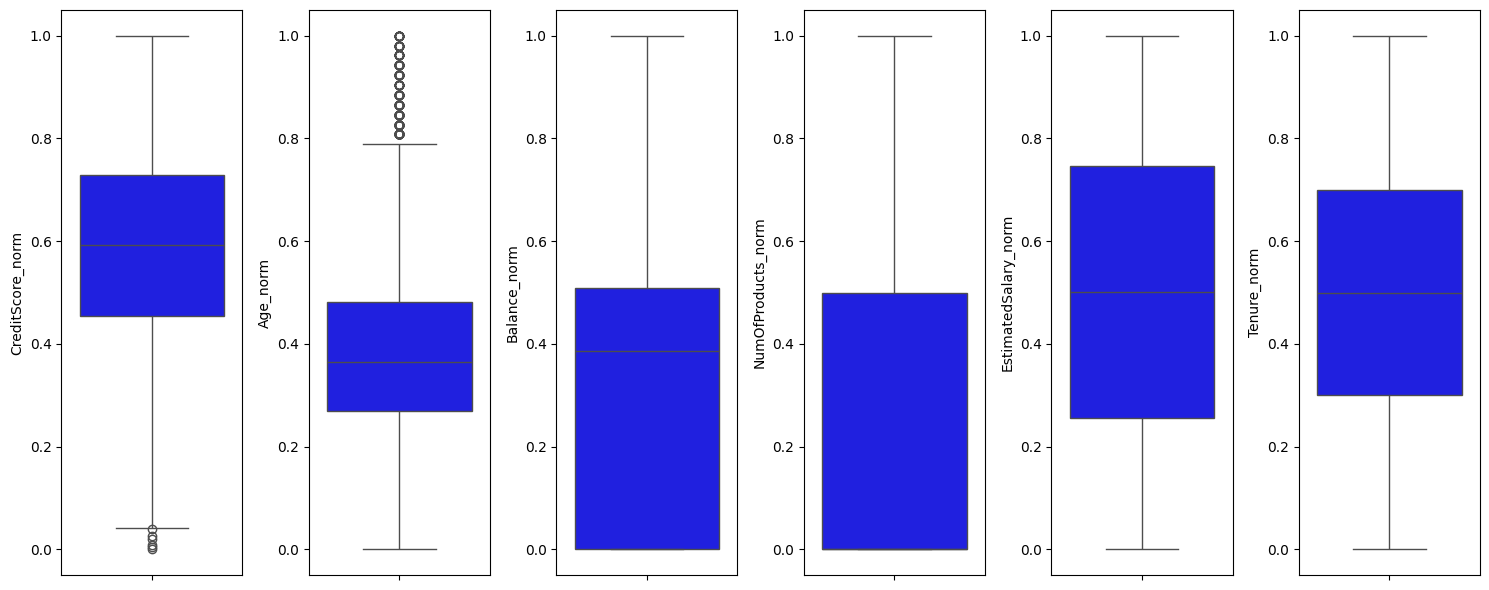

In [24]:
# hanya tambahan: melihat distribusi data (setelah normalisasi / standardisasi)
nums_norm = ['CreditScore_norm', 'Age_norm', 'Balance_norm', 
             'NumOfProducts_norm','EstimatedSalary_norm','Tenure_norm']
fig, axs = plt.subplots(1, len(nums_norm), figsize=(15, 6))

for i in range(len(nums_norm)):
    sns.boxplot(y=df_zscore[nums_norm[i]], color='blue', ax=axs[i], orient='v')
plt.tight_layout()
plt.show()

Hasil Pengamatan: <br>
Dibandingkan dengan boxplot sebelum normalisasi, fitur `CreditScore_norm`, `Age_norm`, `Balance_norm`, `NumOfProducts_norm`,`Tenure_norm`,`EstimatdSalary_norm` kini telah memiliki skala yang sama yaitu di range 0-1.

### 5. Feature Encoding
Proses mengubah feature categorical menjadi feature numerical.

In [25]:
df_zscore.columns

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Tenure_norm', 'EstimatedSalary_norm', 'CreditScore_norm', 'Age_norm',
       'Balance_norm', 'NumOfProducts_norm'],
      dtype='object')

Pengamatan: <br>
  - `IsActiveMember`,`HasCrCard`,`Exited` : sudah merupakan tipe data boolean sehingga tidak diperlukan encoding.<br>
  - `Geography`,`Gender`, dan `NumOfProducts` : bukan merupakan tipe data ordinal (punya urutan), sehingga tahap feature encoding lebih cocok menggunakan One Hot Encoding (OHE).

## One Hot Encoding (OHE)

In [26]:
# Definisi variabel kategorikal untuk di-encode
cats_updated = ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts_norm']

try:
    # Melakukan one-hot encoding
    df_encoded = pd.get_dummies(df_zscore, columns=cats_updated, drop_first=True)
    
    # Menampilkan beberapa baris pertama dari dataframe yang telah di-encoded
    print(df_encoded.head())
except KeyError as e:
    print(f"Error: {e}. Pastikan semua kolom yang ingin di-encode ada dalam DataFrame.")


  Exited  Tenure_norm  EstimatedSalary_norm  CreditScore_norm  Age_norm  \
0      1          0.2              0.506735          0.525667  0.461538   
1      0          0.1              0.562709          0.503080  0.442308   
2      1          0.8              0.569654          0.285421  0.461538   
3      0          0.1              0.469120          0.689938  0.403846   
4      0          0.2              0.395400          1.000000  0.480769   

   Balance_norm  Geography_Germany  Geography_Spain  Gender_Male  \
0      0.000000              False            False        False   
1      0.334031              False             True        False   
2      0.636357              False            False        False   
3      0.000000              False            False        False   
4      0.500246              False             True        False   

   IsActiveMember_1  HasCrCard_1  NumOfProducts_norm_0.5  \
0              True         True                   False   
1              True 

In [27]:
df_encoded.head()

,Exited,Tenure_norm,EstimatedSalary_norm,CreditScore_norm,Age_norm,Balance_norm,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1,NumOfProducts_norm_0.5,NumOfProducts_norm_1.0
0,1,0.2,0.506735,0.525667,0.461538,0.000000,False,False,False,True,True,False,False
1,0,0.1,0.562709,0.503080,0.442308,0.334031,False,True,False,True,False,False,False
2,1,0.8,0.569654,0.285421,0.461538,0.636357,False,False,False,False,True,False,True
3,0,0.1,0.469120,0.689938,0.403846,0.000000,False,False,False,False,False,True,False
4,0,0.2,0.395400,1.000000,0.480769,0.500246,False,True,False,True,True,False,False


## H. Handle class imbalance

dikarenakan variabel target yaitu `Exited` memiliki perbandingan yang lebih sedikit untuk Customer yang churn dibandingan Customer yang Retaine, maka dilakukan over sampling agar datanya sebanding.

### Handling Imbalance Class dengan Metode Over Sampling

In [28]:
from sklearn.utils import resample

# Memisahkan dataset menjadi churn dan tidak churn
df_churn = df_encoded[df_encoded['Exited'] == 1]
df_not_churn = df_encoded[df_encoded['Exited'] == 0]



In [29]:

# Melakukan random oversampling pada data churn
df_churn_oversampled = resample(df_churn, replace=True, n_samples=len(df_not_churn), random_state=42)

# Menggabungkan kembali dataset yang telah disampling ulang
df_oversampled = pd.concat([df_not_churn, df_churn_oversampled])

# Cek distribusi kelas setelah oversampling
distribution_oversampled = df_oversampled['Exited'].value_counts(normalize=True)

distribution_oversampled

Exited
0    0.5
1    0.5
Name: proportion, dtype: float64

In [30]:
df_oversampled.head()

,Exited,Tenure_norm,EstimatedSalary_norm,CreditScore_norm,Age_norm,Balance_norm,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1,NumOfProducts_norm_0.5,NumOfProducts_norm_1.0
1,0,0.1,0.562709,0.503080,0.442308,0.334031,False,True,False,True,False,False,False
3,0,0.1,0.469120,0.689938,0.403846,0.000000,False,False,False,False,False,True,False
4,0,0.2,0.395400,1.000000,0.480769,0.500246,False,True,False,True,True,False,False
6,0,0.7,0.050261,0.942505,0.615385,0.000000,False,False,True,True,True,True,False
8,0,0.4,0.374680,0.283368,0.500000,0.566170,False,False,True,True,False,True,False


### Menampilkan hasil Handling Imbalance Class

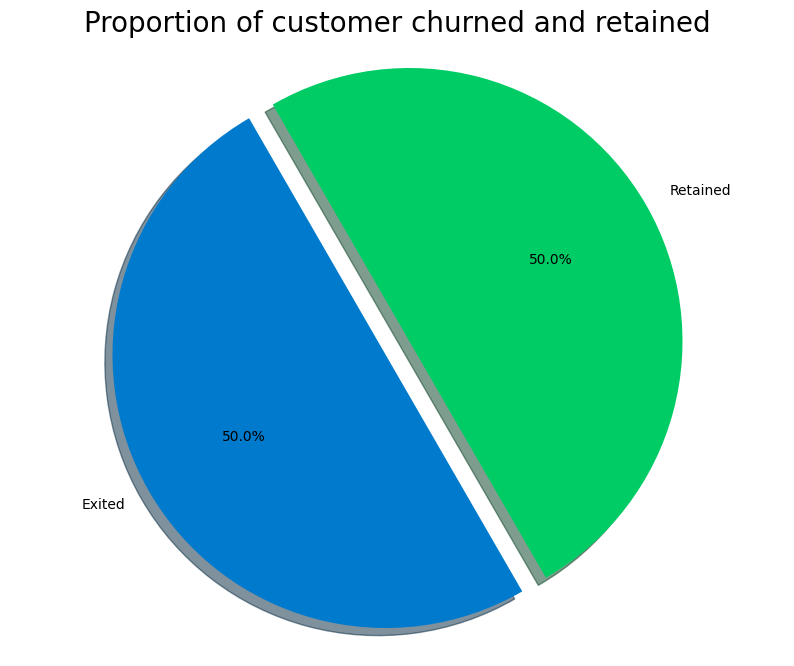

In [31]:
# Menghitung jumlah kasus untuk setiap kategori dalam 'Exited'
sizes = [df_oversampled.Exited[df_oversampled['Exited']==1].count(), df_oversampled.Exited[df_oversampled['Exited']==0].count()]
labels = 'Exited', 'Retained'
explode = (0, 0.1)  # untuk menonjolkan slice pie
warna = ['#007acc', '#00cc66']

# Membuat pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120, colors=warna)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# 2. Feature Engineering

## Melakukan Uji Korelasi Antar Variabel

Uji Korelasi dilakukan dengan metode statistik yaitu Chi Square

In [32]:
from scipy.stats import chi2_contingency
# Menampilkan beberapa baris pertama dari dataset
df_oversampled.head()

# Membuat list kosong untuk menyimpan hasil Chi-square
result_data = []

# Menentukan variabel target
kolom_target = 'Exited'

# Loop melalui kolom-kolom lainnya untuk menghitung Chi-square
for kolom in df_oversampled.columns:
    if kolom != kolom_target:
        tabel_kontingensi = pd.crosstab(df_oversampled[kolom_target], df_oversampled[kolom])
        chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)
        result_data.append({'Variabel': f'{kolom_target} dan {kolom}',
                            'Statistik Chi-square': chi2,
                            'P-value': p_value})

# Membuat DataFrame dari list hasil Chi-square
result_table = pd.DataFrame(result_data)

# Menampilkan tabel hasil Chi-square
print(result_table)

                             Variabel  Statistik Chi-square        P-value
0              Exited dan Tenure_norm             60.017204   3.597236e-09
1     Exited dan EstimatedSalary_norm          15682.000000  5.780629e-284
2         Exited dan CreditScore_norm           1290.007658   6.302732e-81
3                 Exited dan Age_norm           3128.114093   0.000000e+00
4             Exited dan Balance_norm          10926.538795  1.198253e-263
5        Exited dan Geography_Germany            740.789794  4.036904e-163
6          Exited dan Geography_Spain             85.376184   2.466738e-20
7              Exited dan Gender_Male            252.117650   8.969753e-57
8         Exited dan IsActiveMember_1            583.001884  8.338975e-129
9              Exited dan HasCrCard_1              3.739780   5.313146e-02
10  Exited dan NumOfProducts_norm_0.5           2172.306717   0.000000e+00
11  Exited dan NumOfProducts_norm_1.0            751.664632  1.743617e-165


### Kesimpulan Hasil Uji Chi-Square

Hasil uji Chi-square digunakan untuk mengevaluasi hubungan statistik yang signifikan antara variabel "Exited" (keluar) dan variabel-variabel lainnya dalam dataset. Berikut adalah ringkasan hasil uji untuk masing-masing variabel:

1. **Exited vs. Tenure_norm**:
   - Statistik Chi-square: 60.02
   - P-value: 3.60e-09 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Tenure_norm," karena nilai p-value sangat kecil.

2. **Exited vs. EstimatedSalary_norm**:
   - Statistik Chi-square: 15682.0
   - P-value: 5.78e-284 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "EstimatedSalary_norm," karena nilai p-value sangat kecil.

3. **Exited vs. CreditScore_norm**:
   - Statistik Chi-square: 1290.01
   - P-value: 6.30e-81 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "CreditScore_norm," karena nilai p-value sangat kecil.

4. **Exited vs. Age_norm**:
   - Statistik Chi-square: 3128.11
   - P-value: 0.0
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Age_norm," karena nilai p-value sangat kecil.

5. **Exited vs. Balance_norm**:
   - Statistik Chi-square: 10926.54
   - P-value: 1.20e-263 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Balance_norm," karena nilai p-value sangat kecil.

6. **Exited vs. Geography_Germany**:
   - Statistik Chi-square: 740.79
   - P-value: 4.04e-163 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Geography_Germany," karena nilai p-value sangat kecil.

7. **Exited vs. Geography_Spain**:
   - Statistik Chi-square: 85.38
   - P-value: 2.47e-20 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Geography_Spain," karena nilai p-value sangat kecil.

8. **Exited vs. Gender_Male**:
   - Statistik Chi-square: 252.12
   - P-value: 8.97e-57 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "Gender_Male," karena nilai p-value sangat kecil.

9. **Exited vs. IsActiveMember_1**:
   - Statistik Chi-square: 583.00
   - P-value: 8.34e-129 (sangat mendekati nol)
   - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "IsActiveMember_1," karena nilai p-value sangat kecil.

10. **Exited vs. HasCrCard_1**:
    - Statistik Chi-square: 3.74
    - P-value: 0.0531
    - **Kesimpulan**: Tidak terdapat hubungan yang signifikan antara variabel "Exited" dan "HasCrCard_1," karena nilai p-value lebih besar dari tingkat signifikansi yang biasanya digunakan (0.05).

11. **Exited vs. NumOfProducts_norm_0.5**:
    - Statistik Chi-square: 2172.31
    - P-value: 0.0
    - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "NumOfProducts_norm_0.5," karena nilai p-value sangat kecil.

12. **Exited vs. NumOfProducts_norm_1.0**:
    - Statistik Chi-square: 751.66
    - P-value: 1.74e-165 (sangat mendekati nol)
    - **Kesimpulan**: Terdapat hubungan yang sangat signifikan antara variabel "Exited" dan "NumOfProducts_norm_1.0," karena nilai p-value sangat kecil.

Dalam semua kasus di atas, nilai p-value yang sangat rendah menunjukkan adanya hubungan yang signifikan antara variabel "Exited" dan variabel-variabel yang diuji, kecuali untuk `HasCrCard_1` yang tidak memiliki hubungan yang signifikan. Oleh karena itu, hasil uji Chi-square memberikan wawasan tentang faktor-faktor yang memengaruhi keputusan pelanggan untuk keluar (Exited) atau tetap berada di bank.


### A. Feature selection

Berdasarkan Hasil Chi Square dilakukan drop kolom untuk variabel `HasCrCard_1`

In [ ]:
try:
    # Hapus kolom-kolom yang ada dalam list columns_to_drop
    df_oversampled = df_oversampled.drop(columns='HasCrCard_1')
except KeyError as e:
    # Tangani pengecualian jika kolom tidak ada dalam DataFrame
    print(f"Exception: {e} tidak ada dalam DataFrame")

### B. Feature Extraction

Tidak perlu dilakukan Feature extraction dikarenakan dan semua variabel numerik sudah dilakukan feature transformation

### C. Usulan Fitur Tambahan



- Interaksi antara `Age` dan `NumOfProducts`.
- Rasio `Balance` terhadap `EstimatedSalary`.
- Durasi pelanggan dengan bank.
- Frekuensi transaksi.